In [25]:
%matplotlib inline
#
from os import chdir, getcwd
ROOTF = 'LRG-Signed'
if getcwd()[-len(ROOTF):] != ROOTF:
    chdir('../')
print('cwd:', getcwd())
#
from src.LRGSG_package.LRGSG import *
plt.style.use("notebooks/nb_plotsheet.mplstyle")

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [43]:
geometry = 'hexagonal'
if geometry == 'triangular':
    pc=0.159
elif geometry == 'hexagonal':
    pc= 0.065
elif geometry == 'squared':
    pc = 0.103
folder = f'data/l2d_{geometry}/N=4096_navg=1000/'
lsp = lsp_read_values(f"{folder}", fpattern='fract_p')
mean = []
for p in lsp:
    fract = np.loadtxt(f"{folder}fract_p={p}.bin")
    mean.append([np.mean(fract), np.var(fract)])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


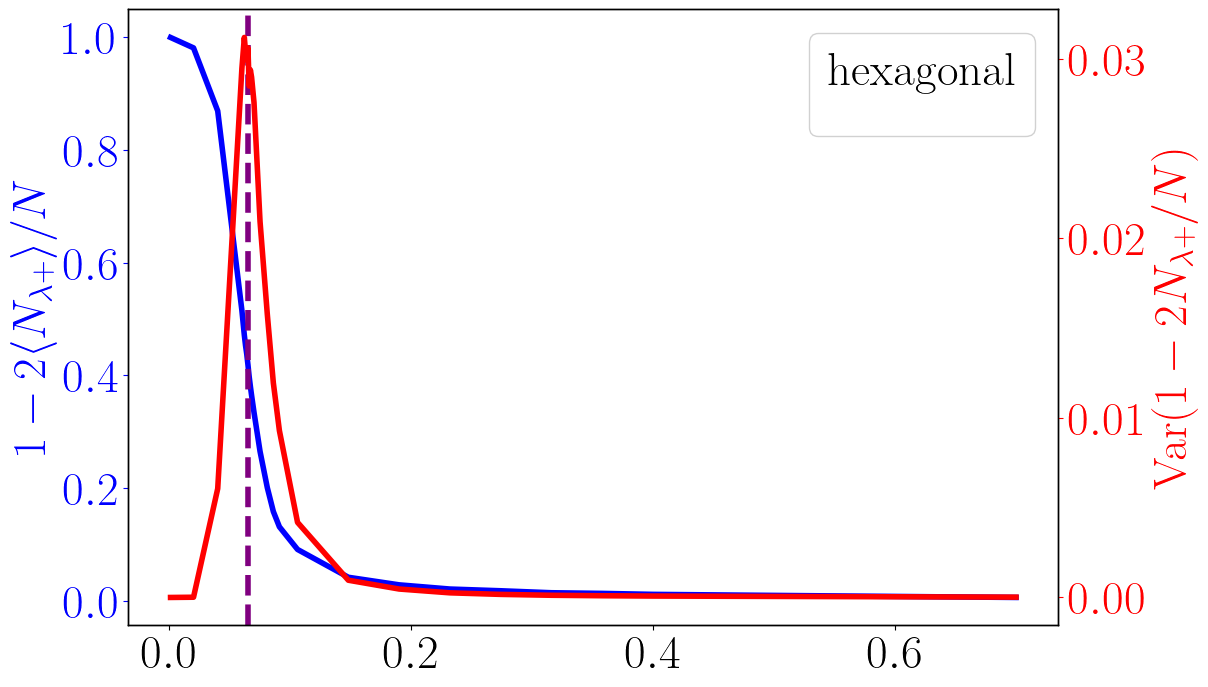

In [44]:

fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx() 
ax1.plot(lsp, np.array(mean)[:, 0], 'b-')
ax2.plot(lsp, np.array(mean)[:, 1], 'r-')
ax1.axvline(pc, ls='--', color='purple')
ax1.set_ylabel(r"$1 - 2\avg{N_{\lambda+}}/N$", color='blue')
ax2.set_ylabel(r"$\Var(1-2N_{\lambda+}/N)$", color='red')
# ax1.set_xbound([0, 0.3])
ax1.legend(title=f"{geometry}")
ax2.tick_params(axis='y', colors='red')
ax1.tick_params(axis='y', colors='blue')
# fig.tight_layout()
fig.savefig(f"{geometry}.pdf", bbox_inches='tight', transparent=True)